<a href="https://colab.research.google.com/github/douglassc1999/computer_vision/blob/master/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Template Matching </h1>




In [7]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

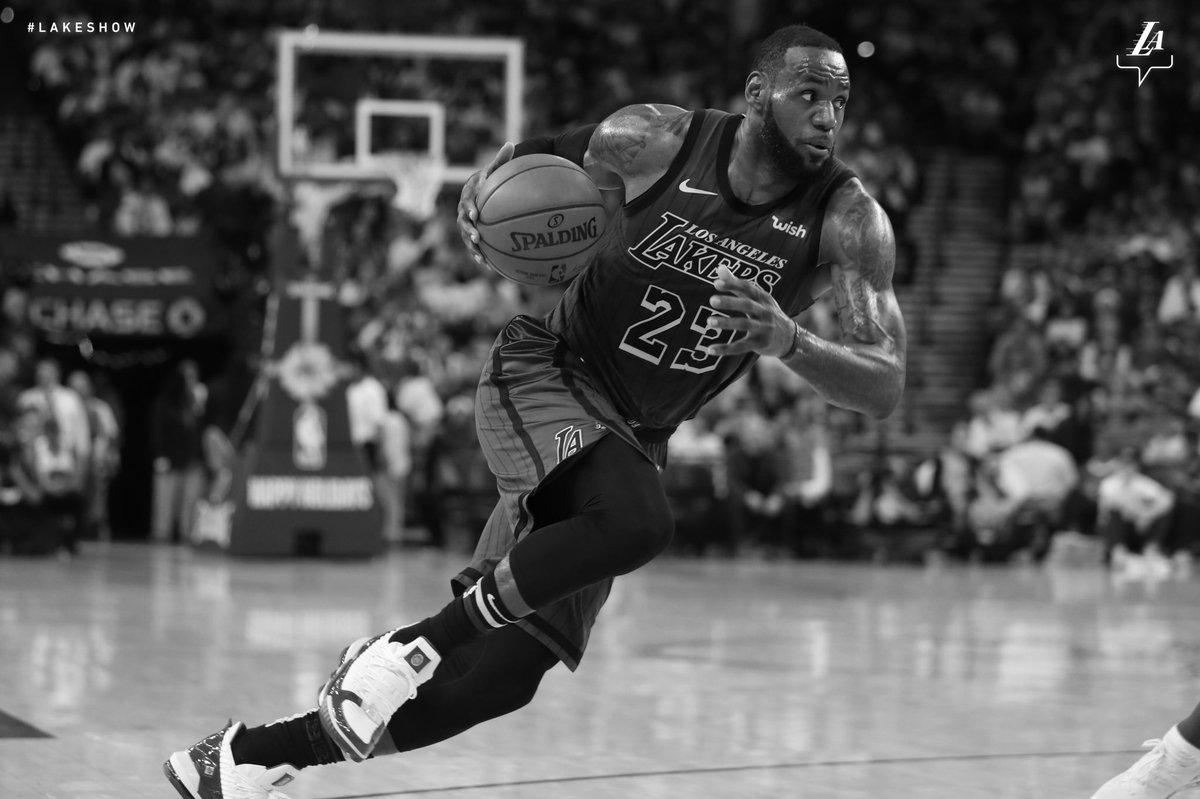

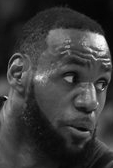

In [23]:
imagem1 = cv.imread('lebron-james.jpg', 0)
cv2_imshow(imagem1)
imagem2 = cv.imread('lebron-james.jpg', 0)
template = cv.imread('template-lebron.jpg', 0)
cv2_imshow(template)

w, h = template.shape[::-1]

In [17]:
# Métodos de comparações que o openCV possue
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


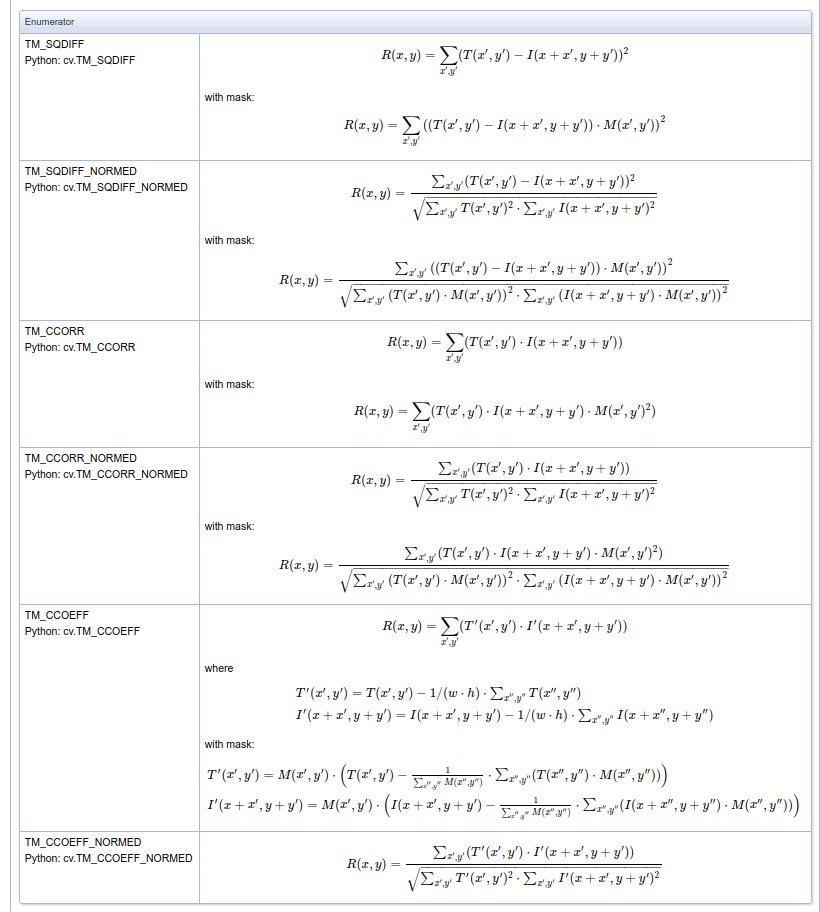

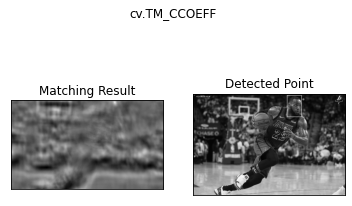

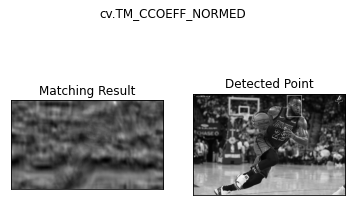

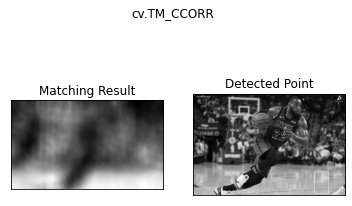

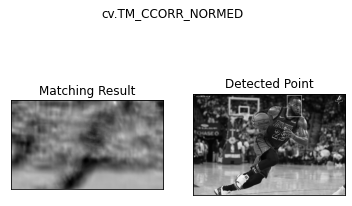

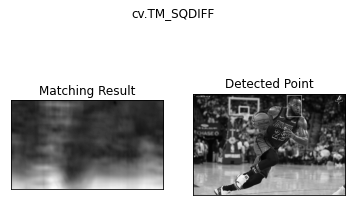

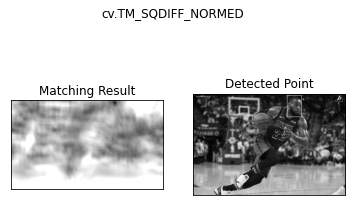

In [24]:
for meth in methods:
  img = imagem2.copy()
  method = eval(meth)

  #Aplicando o template Matching
  res = cv.matchTemplate(img, template, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
      top_left = min_loc
  else:
      top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(img,top_left, bottom_right, 255, 2)
  plt.subplot(121),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)
  plt.show()
